In [1]:
# Imports
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from IPython.display import Image, display

ROOT = os.path.dirname("./")
MODELS_DIR = os.path.join(ROOT, 'models')

# Load test set
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv').squeeze()
print('Loaded test set:', X_test.shape, 'labels:', y_test.shape)

# Load sentry pipeline
sentry_path = os.path.join(MODELS_DIR, 'sentry_pipeline.pkl')
sentry = joblib.load(sentry_path)
print('Loaded Sentry model from', sentry_path)

Loaded test set: (2000, 9) labels: (2000,)
Loaded Sentry model from .\models\sentry_pipeline.pkl


Confusion matrix (rows=true, cols=pred):
[[1877   55]
 [  11   57]]
Classification report:
              precision    recall  f1-score   support

           0     0.9942    0.9715    0.9827      1932
           1     0.5089    0.8382    0.6333        68

    accuracy                         0.9670      2000
   macro avg     0.7516    0.9049    0.8080      2000
weighted avg     0.9777    0.9670    0.9708      2000



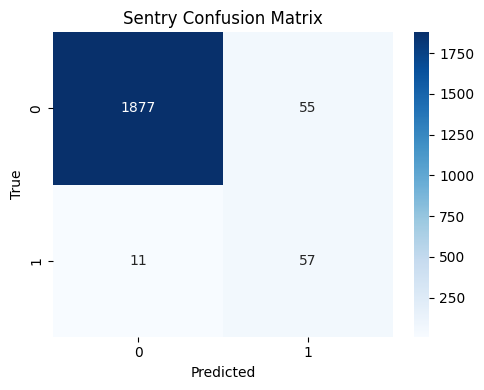

In [3]:
# Predict and compute confusion matrix
y_pred = sentry.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix (rows=true, cols=pred):')
print(cm)
print('Classification report:')
print(classification_report(y_test, y_pred, digits=4))

# Plot confusion matrix heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Sentry Confusion Matrix')
plt.tight_layout()
plt.show()

Top features (Sentry):
                feature  importance
 Rotational speed [rpm]    0.357108
                Power_W    0.168172
        Tool wear [min]    0.160747
            Temp_Diff_K    0.091129
            Torque [Nm]    0.086986
            Strain_Load    0.057325
    Air temperature [K]    0.031994
Process temperature [K]    0.030118
           Type_encoded    0.016422


C:\Users\advay\AppData\Local\Temp\ipykernel_13304\2844678353.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=fi, palette='viridis')


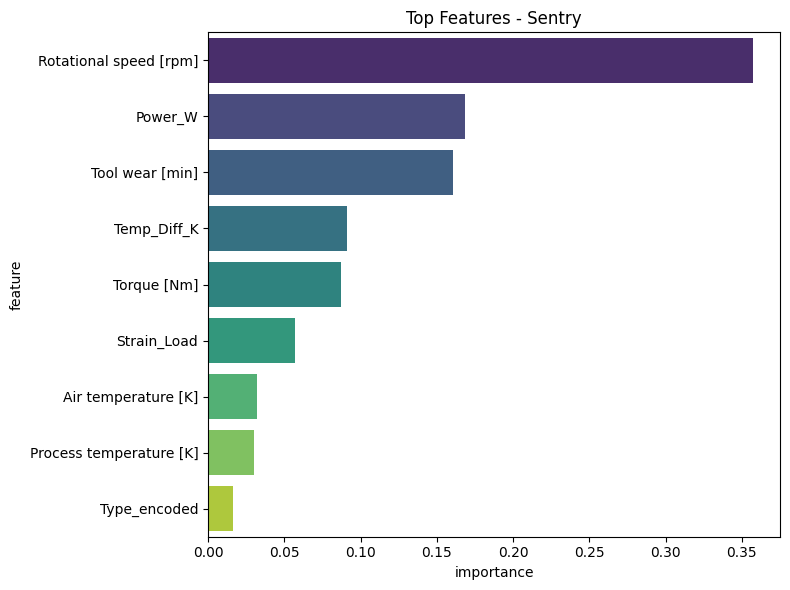

In [4]:
# Feature importances from the pipeline
def get_feature_importances_from_pipeline(pipeline, feature_names, top_n=15):
    try:
        estimator = pipeline.steps[-1][1]
    except Exception:
        estimator = pipeline
    importances = None
    if hasattr(estimator, 'feature_importances_'):
        importances = estimator.feature_importances_
    elif hasattr(estimator, 'coef_'):
        coef = estimator.coef_
        if coef.ndim == 1:
            importances = np.abs(coef)
        else:
            importances = np.sum(np.abs(coef), axis=0)
    if importances is None:
        raise RuntimeError('Estimator has no importances or coef_')
    L = min(len(importances), len(feature_names))
    importances = importances[:L]
    feature_names = feature_names[:L]
    fi = pd.DataFrame({'feature': feature_names, 'importance': importances})
    fi = fi.sort_values('importance', ascending=False).reset_index(drop=True)
    return fi.head(top_n)

feature_names = list(X_test.columns)
fi = get_feature_importances_from_pipeline(sentry, feature_names, top_n=20)
print('Top features (Sentry):')
print(fi.to_string(index=False))

# Barplot
plt.figure(figsize=(8,6))
sns.barplot(x='importance', y='feature', data=fi, palette='viridis')
plt.title('Top Features - Sentry')
plt.tight_layout()
plt.show()

--- fi_sentry.png ---


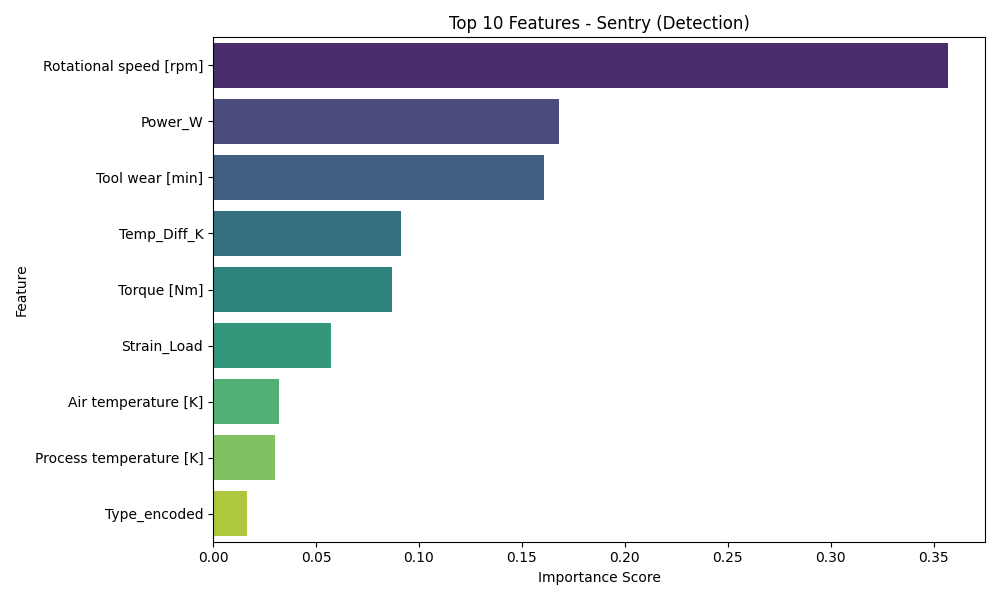

--- fi_specialist.png ---


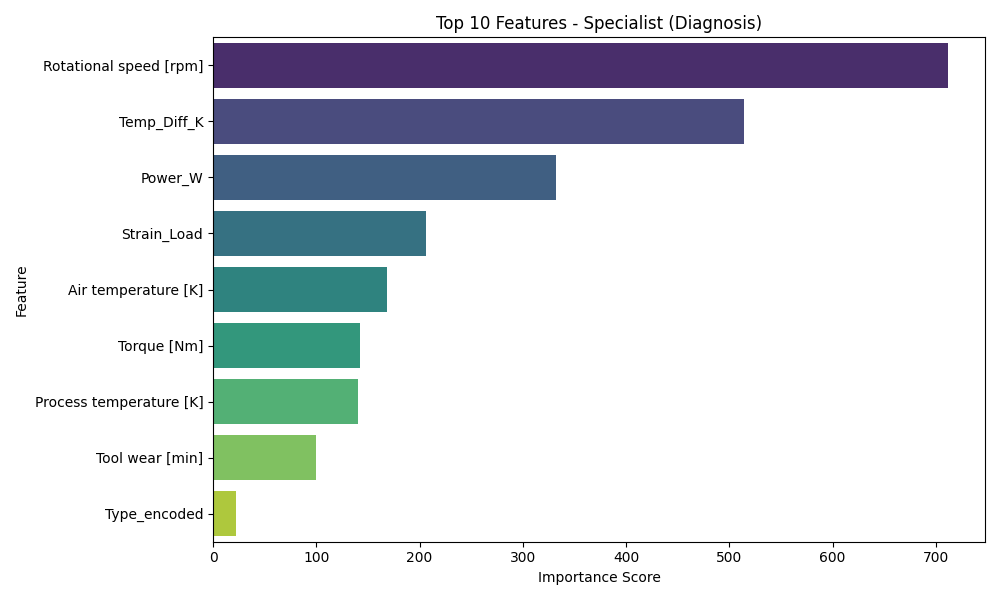

--- results_summary.txt ---


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte

In [6]:
# Display saved feature-importance images (if present) and results summary
for fn in ['fi_sentry.png', 'fi_specialist.png', 'results_summary.txt']:
    if os.path.exists(fn):
        print('---', fn, '---')
        if fn.endswith('.png'):
            display(Image(fn))
        else:
            print(open(fn, 'r', encoding='utf-8').read())
    else:
        print(fn, 'not found in notebook directory')